In [5]:
"""
Goal: Given the scalar system x[i + 1] = a * x[i] + u[i] + w[i], learn $a$ in $T$ time timesteps
Condition: x[i] must always be kept "small" - specifically, E(x[i]^2) < D, where expectation is taken
over the *initial* distribution of *a* (and noise).
"""

import numpy as np
import matplotlib.pyplot as plt

from plot_helper import plot_histogram

In [10]:
def verify(a_hat, u, D, sigma):
    pass

def simulate(controller, *, a_hat, T, D, sigma, verbose):
    x = np.zeros(T + 1)
    u = np.zeros(T)
    for t in range(T):
        u[t] = controller(x, u, t, D)
        x[t + 1] = a_hat * x[t] + u[t] + np.random.normal(0, sigma)
    
        limit = max(x[t + 1], -x[t + 1])
        if limit > D * 10 or verbose and limit > D:
            print("err", limit, D, "a=", estimate_a(x[:t+1], u[:t]), "t=", t)
        elif verbose:
            print("ok", limit, D)

    a = estimate_a(x, u)
    
    verify(a_hat, u, D, sigma)

    if verbose:
        print(controller.__name__, ": ", a_hat)
    return a, a_hat

def estimate_a(x, u):
    x0 = x[:-1].reshape((-1, 1))
    x1 = (x[1:] - u).reshape((-1, 1))
    return float(np.linalg.lstsq(x0, x1, rcond=None)[0])

In [13]:
strategies = []
def strategy(f):
    strategies.append(f)
    return f

"""
Strategy 0: Do literally nothing.
"""
# @strategy
def zero_strategy(x, u, t, D):
    return 0

"""
Strategy 1: Keep controlling x[i + 1] to zero using the current best estimate of a
"""
@strategy
def control_to_zero_strategy(x, u, t, D):
    if t == 0:
        return 0
    a_hat = estimate_a(x[:t+1], u[:t])
    return -a_hat * x[t]

"""
Strategy 2: Control x[i + 1] to zero using the current best estimate of a whenever x[i + 1] would otherwise
be estimated to exceed D
"""
@strategy
def control_to_zero_when_greater_than_D(x, u, t, D):
    if t == 0:
        return 0
    a_hat = estimate_a(x[:t+1], u[:t])
    if a_hat and abs(x[t]) > D / a_hat:
        return -a_hat * x[t]
    return 0


"""
Strategy 3: Control x[i + 1] down to D using the current best estimate of a whenever x[i + 1] would otherwise
be estimated to exceed D
"""
@strategy
def shrink_when_near_D(x, u, t, D):
    if t == 0:
        return 0
    a_hat = estimate_a(x[:t+1], u[:t])
    if a_hat and abs(x[t]) > D / a_hat:
        return -a_hat * x[t] + D
    return 0

"""
Strategy 4: Control x[i + 1] down to flipped D using the current best estimate of a whenever x[i + 1] would otherwise
be estimated to exceed D
"""
@strategy
def flip_when_near_D(x, u, t, D):
    if t == 0:
        return 0
    a_hat = estimate_a(x[:t+1], u[:t])
    if a_hat and abs(x[t]) > D / a_hat:
        return -a_hat * x[t] - D
    return 0


err 256.646831026916 10 a= 128.6145796326402 t= 2
err 119.40563045040702 10 a= -82.96841463819511 t= 2
err 378.9605517366006 10 a= 309.3098184563409 t= 2
err 355.10837241522023 10 a= 2.936090335979714 t= 3
err 299.1320414259005 10 a= -185.54229375619482 t= 2
err 664.1070491782046 10 a= -592.5229276234285 t= 2
err 162.78198823891205 10 a= 2.2460991507404735 t= 3
err 327.8932694222697 10 a= -175.88765401134503 t= 2
err 129.00212093116448 10 a= 2.399904147802187 t= 3
err 1934.435242731692 10 a= -1285.8114209854562 t= 2
err 2823.0334388309834 10 a= 0.5405401283509167 t= 3
err 351.1340030381445 10 a= 376.29155132311666 t= 2
err 594.2389122440148 10 a= 3.6916543746833743 t= 3
err 102.03510695064132 10 a= -85.82643861320477 t= 2
err 157.96992472366452 10 a= 3.5481757956073685 t= 3
err 114.58365553954744 10 a= -62.900891855176795 t= 2
err 134.25678490126714 10 a= -113.43605040612472 t= 2
err 125.2014933438652 10 a= 8.54818997732138 t= 3
err 309.8049101672284 10 a= 391.52581014229963 t= 2
err 1

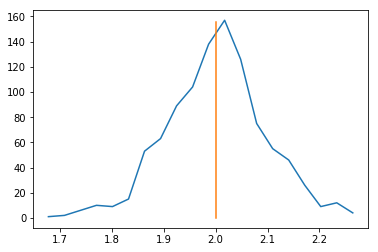

err 178.49298276242135 10 a= -2.9686899223274104 t= 3
err 136.22597615259073 10 a= -154.39337631443635 t= 2
err 299.99702230586024 10 a= 4.211190436566168 t= 3
err 169.6163990069196 10 a= -108.22069778691582 t= 2
err 103.0339897930314 10 a= 101.45789048536246 t= 2
err 289.3287198338979 10 a= -0.8982362944757325 t= 3
err 360.23717975258046 10 a= -133.37934856984475 t= 2
err 176.1045150289423 10 a= -63.318738297353846 t= 2
err 119.48608303376766 10 a= -81.66360101943607 t= 2
err 119.3412916096792 10 a= 4.865644577729175 t= 3
err 123.58732560151213 10 a= -109.37061682980416 t= 2
control_to_zero_when_greater_than_D 0.024396236819757354


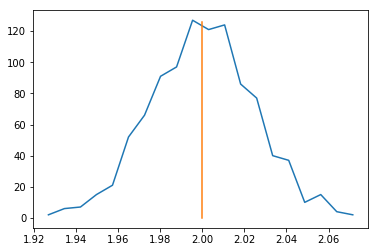

err 123.43078760653273 10 a= -81.97323105335903 t= 2
err 266.0573318745233 10 a= 132.81039692457205 t= 2
err 148.01296676471227 10 a= 74.87878443086167 t= 2
err 103.45074771085011 10 a= 1.3681739529601378 t= 3
err 479.3178852711018 10 a= 186.6194489215499 t= 2
err 131.758409420562 10 a= 2.296543957090364 t= 3
err 333.35593175279445 10 a= -167.0738249258293 t= 2
err 150.3953818822292 10 a= 2.4173368597603138 t= 3
err 1218.515718123121 10 a= -408.4178286060988 t= 2
err 566.6758921499003 10 a= 1.5425689640476836 t= 3
err 276.85193832176094 10 a= 169.81516856110824 t= 2
err 107.7504395188823 10 a= 1.5793391167877966 t= 3
err 170.1222706996634 10 a= 25.34591980771829 t= 3
err 193.83803904466689 10 a= -22.319281853711605 t= 3
err 108.38507954281506 10 a= 234.6207616828086 t= 2
err 686.9342881449979 10 a= -4.246803429126565 t= 3
err 147.3684675590856 10 a= -49.938224166324076 t= 2
shrink_when_near_D 0.010353898941893026


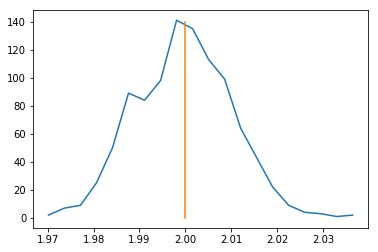

err 1813.8814838799608 10 a= 698.9421356177496 t= 2
err 778.6670345396233 10 a= 1.5645282200775692 t= 3
err 107.39754315761982 10 a= 181.4252917069354 t= 2
err 210.25199547428355 10 a= -1.1373010066556248 t= 3
err 123.86035977817217 10 a= -47.90122071872178 t= 2
err 601.9304567008953 10 a= -640.2244382465703 t= 2
err 964.1179784677797 10 a= 3.6212854861451453 t= 3
err 159.4617236306697 10 a= -90.41544065927701 t= 2
err 183.45955350589256 10 a= 125.74436879055187 t= 2
err 157.9182288924446 10 a= -10.502776918901233 t= 3
err 338.2567837379812 10 a= -185.85005924527414 t= 2
err 245.6389036111606 10 a= -103.7327287763941 t= 2
err 241.1364664579838 10 a= -106.74114936741616 t= 2
err 183.03631937043548 10 a= 4.720197697578745 t= 3
err 295.5418764117767 10 a= 80.2799607185012 t= 2
err 153.1805078889725 10 a= 103.23842783486418 t= 2
flip_when_near_D 0.010189205108736187


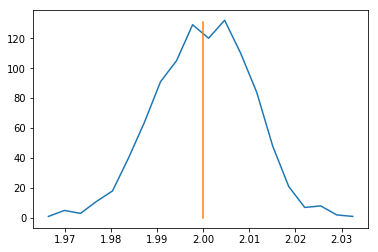

In [14]:
params = { "a_hat": 2, "T": 100, "sigma": 1, "D": 10, "verbose": False }


NUM_ITERATIONS = 1000

for strategy in strategies:
    data = np.zeros(NUM_ITERATIONS)
    for i in range(NUM_ITERATIONS):
        a, a_hat = simulate(strategy, **params)
        data[i] = a
    print(strategy.__name__, np.std(data))
    plot_histogram(data, 20, None, a_hat)
    plt.show()

control_to_zero_strategy


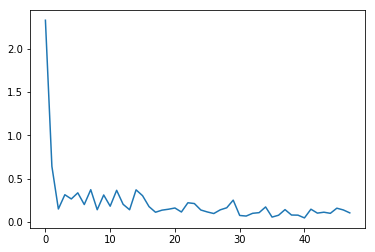

err 129.12993003343155 10 a= -134.30945168736042 t= 2
err 2574.372159452027 10 a= -2246.889539866498 t= 2
err 2690.21476744878 10 a= 3.0448225540167795 t= 3
err 198.50175215714413 10 a= -97.22729745040115 t= 2
control_to_zero_when_greater_than_D


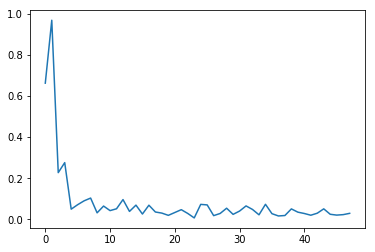

err 187.68257810718083 10 a= -162.18811018318905 t= 2
err 115.08857822091963 10 a= -47.06764555879627 t= 2
err 259.80418456072124 10 a= 132.0095053455176 t= 2
err 108.4386310718226 10 a= 1.5447233853213964 t= 3
shrink_when_near_D


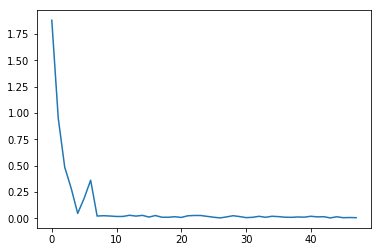

err 224.71199264299017 10 a= -22.264586862690006 t= 3
err 242.49382963094098 10 a= 167.0767044823035 t= 2
err 147.95814704647273 10 a= -66.47863454007361 t= 2
err 2916.0876650273485 10 a= -2425.4404041504354 t= 2
err 1461.7833541653943 10 a= 1.5025984298932464 t= 3
err 173.89132104552655 10 a= 26.74608828468727 t= 3
flip_when_near_D


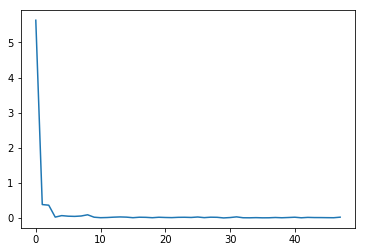

In [9]:
NUM_ITERATIONS = 5

MIN_TIME = 2
MAX_TIME = 50

for strategy in strategies:
    stdevs = np.zeros(MAX_TIME - MIN_TIME)
    for t in range(MIN_TIME, MAX_TIME):
        data = np.zeros(NUM_ITERATIONS)
        for i in range(NUM_ITERATIONS):
            a, a_hat = simulate(strategy, **{**params, "T": t})
            data[i] = a
        stdevs[t - MIN_TIME] = np.std(data)
    
    print(strategy.__name__)
#     plt.yscale('log')
    plt.plot(stdevs)
    plt.show()